In [31]:
import tensorflow as tf

In [2]:
'''
1. 데이터가 필요하다
2. 얼마나 많은 클러스터를 만들지 결정한다.
(ex 100명의 고객 모두 맞춤형 옷을 만들긴 힘들므로 s,m,l로 평준화된 사이즈로 클러스터하면 쉬울 것)
3. 클러스터의 중심을 설정한다.(centroid)
(방법 . 랜덤으로,매뉴얼,k-mean)
4. 주어진 데이터 포인트들이 어떤 centroid에 가까운지 설정
5. 클러스터의 중심을 centroid로 옮긴다.
6. 4,5를 반복(클러스터의 변화가 없을 때 멈춘다.(=데이터들의 변경이 없다))
'''


'\n1. 데이터가 필요한다\n2. 얼마나 많은 클러스터를 만들지 결정한다.\n(ex 100명의 고객 모두 맞춤형 옷을 만들긴 힘들므로 s,m,l로 평준화된 사이즈로 클러스터하면 쉬울 것)\n3. 클러스터의 중심을 설정한다.(centroid)\n(방법 . 랜덤으로,매뉴얼,k-mean)\n4. 주어진 데이터 포인트들을 centroid에 가까운지 설정\n5. 클러스터의 중심을 centroid로 옮긴다.\n6. 4,5를 반복(클러스터의 변화가 없을 때 멈춘다.)\n'

In [3]:
'''
centorid 초기화.
방법들 중 manually assign,
위도 경도의 도시로 구분할때 수동으로 지정해주는 방법
방법들 중 랜덤, 수동 포인트 지정이 어려울땐 k-mean++,
첫 data 위치에 첫 centroid를 init 두번째는 첫번째 centorid에서 가장 먼 위치에 init
세번째는 c1,c2와 공통적으로 먼곳에 c3 init 이러한 방법으로 초기 centroid 지정.
'''

'\ncentorid 초기화.\n방법들 중 manually assign,\n위도 경도의 도시로 구분할때 수동으로 지정해주는 방법\n방법들 중 랜덤, 수동 포인트 지정이 어려울땐 k-mean++,\n첫 data 위치에 첫 centroid를 init 두번째는 첫번째 centorid에서 가장 먼 위치에 init\n세번째는 c1,c2와 공통적으로 먼곳에 c3 init 이러한 방법으로 초기 centroid 지정.\n'

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [3]:
df = pd.DataFrame(columns=['x','y'])

import random
for i in range(50) :
    df.loc[i] = [random.randrange(1,100),random.randrange(1,100)]
#난수 생성

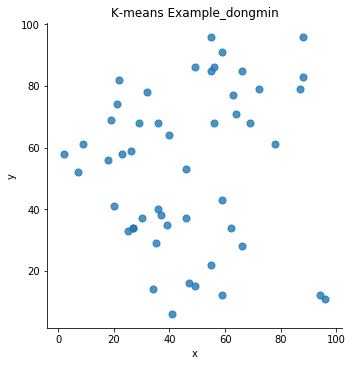

In [4]:
sb.lmplot('x','y', data = df, fit_reg = False, scatter_kws = {"s":50})
#fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
plt.title('K-means Example_dongmin')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [7]:
#할떄마다 바뀐다.
df_obj = df.values #numpy를 사용하기 위해 객체로 변환
kmeans = KMeans(n_clusters = 5).fit(df_obj) #3개의 클러스트 발생
kmeans.cluster_centers_  #클러스터와
kmeans.labels_ #라벨이 설정된다

array([2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 3, 0, 3, 3, 1, 2, 1, 4, 3, 2, 2,
       1, 0, 3, 3, 0, 3, 2, 1, 0, 3, 0, 3, 3, 0, 1, 0, 3, 2, 2, 4, 3, 3,
       0, 0, 0, 2, 1, 1])

Text(0.5, 1, 'K-means Example_label')

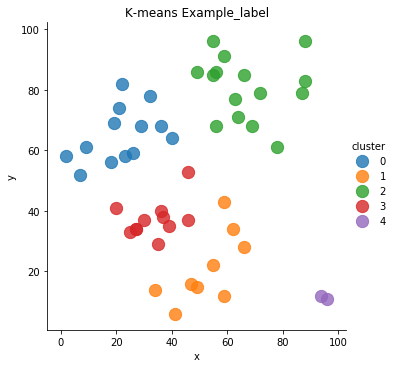

In [6]:
df['cluster'] = kmeans.labels_
#생성된 라벨을 새로운 컬럼값으로 저장

sb.lmplot('x','y', data = df, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster")
plt.title('K-means Example_label')